In [1]:
# DimensionCluster
from starry.vision.data.superImage import DimensionCluster


cluster = DimensionCluster(r"~\Dataset\cats_and_dogs_filtered\train\cats\dimensions.csv", shuffle=True, no_repeat=True)
#print(cluster.name_dict)

it = iter(cluster)
print(next(it))
print(next(it))
print(next(it))


((248, 344), ['cat.334.jpg', 'cat.487.jpg'])
((248, 248), ['cat.157.jpg', 'cat.168.jpg', 'cat.322.jpg', 'cat.629.jpg', 'cat.874.jpg'])
((112, 80), ['cat.146.jpg'])


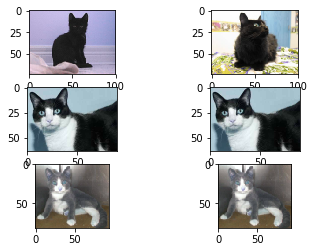

In [4]:
import matplotlib.pyplot as plt
from starry.vision.data.superImage import SuperImage


data = SuperImage(r"~\Dataset\cats_and_dogs_filtered\train\cats", dimensions=r"~\Dataset\cats_and_dogs_filtered\train\cats\dimensions.csv",
	shuffle=True, cluster_size=0x100 * 0x100 * 3, split='1..8/10')

it = iter(data)
x1, y1 = next(it)
x2, y2 = next(it)
x3, y3 = next(it)

_, ax = plt.subplots(3, max(len(y1), len(y2), len(y3)))

for i, y in enumerate([y1, y2, y3]):
	for ii, img in enumerate(y):
		img = img.permute(1, 2, 0).numpy()[:, :, ::-1]
		ax[i, ii].imshow(img)

plt.show()


In [1]:
# load model
import torch
from starry.utils.config import Configuration
from starry.utils.model_factory import loadModel


config = Configuration.create('configs/superimg-test.yaml')
model = loadModel(config['model'])

x = torch.randn(1, 3, 32, 32)
y = model(x)
print('y:', y.shape)


/home/xunan/.local/lib/python3.6/site-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


y: torch.Size([1, 3, 128, 128])
